<a href="https://colab.research.google.com/github/SockAndSandal/DWM_Experiments/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

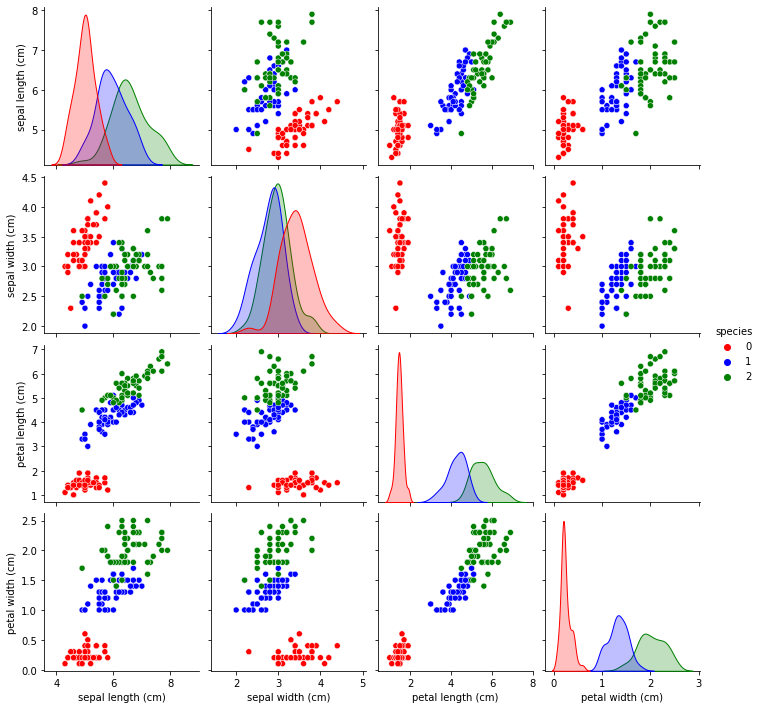

In [ ]:
from sklearn.datasets import load_iris
# Load Iris Data
iris = load_iris()

iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

main_df = pd.concat([iris_df, target_df], axis= 1)
main_df.describe()

sns.pairplot(main_df, hue= 'species', palette={1:'blue', 2:'green', 0:'red'})

In [ ]:
Xsimp = iris_df['petal length (cm)']
Ysimp = iris_df['petal width (cm)']
x_train, x_test, y_train, y_test = train_test_split(Xsimp, Ysimp, test_size= 0.33, random_state= 101)


In [ ]:
lr = LinearRegression()

lr.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred = lr.predict(x_test.values.reshape(-1, 1))


In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, ypred))
print('Mean Squared Error:', mean_squared_error(y_test, ypred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, ypred)))

Mean Absolute Error: 0.14858181575490056
Mean Squared Error: 0.04192709278180536
Mean Root Squared Error: 0.2047610626603734


In [ ]:
print(lr.intercept_)
print(lr.coef_)

-0.39626474113474885
[0.42603978]


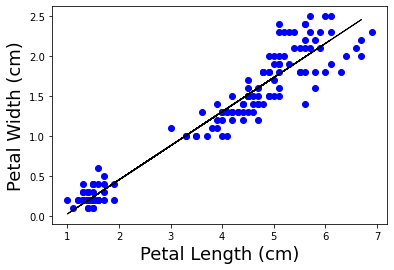

In [ ]:
plt.scatter(Xsimp, Ysimp,  color='blue')
plt.plot(x_test, ypred, color='black', linewidth=1)
plt.xlabel('Petal Length (cm)', fontsize=18)
plt.ylabel('Petal Width (cm)', fontsize=18)
plt.show()

Multiple Regression

In [ ]:
X_multi= iris_df.drop(labels= 'sepal length (cm)', axis= 1)
Y_multi= iris_df['sepal length (cm)']

In [ ]:
x_train_mul, x_test_mul, y_train_mul, y_test_mul = train_test_split(X_multi, Y_multi, test_size= 0.33, random_state= 101)

In [ ]:
lr = LinearRegression()


In [ ]:
lr.fit(x_train_mul, y_train_mul)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.predict(x_test_mul)
pred = lr.predict(x_test_mul)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 4.5922540736808966
Mean Squared Error: 21.262051941771166
Mean Root Squared Error: 4.611079259974954


In [ ]:
print('Y intercept:', lr.intercept_)
print('Coefficients for regression:', lr.coef_)

Y intercept: 1.7401624325366667
Coefficients for regression: [ 0.67147027  0.76552651 -0.70247484]
